In [22]:
import os 
os.chdir(r"G:\Mi unidad\2021-I\optimizacion\admm-matrix-completion")

from data import load_data, load_gif_data
from core.utils import Mask

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat



data = loadmat('./imgs/test/prueba.mat')
image = np.float32(data['im'] / 255 )
mask = np.float32(data['mask'])
corrupted = np.float32(data['y'] / 255 )

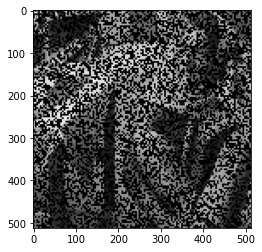

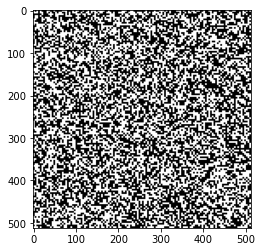

In [23]:
plt.imshow(corrupted, cmap='gray')
plt.show()

plt.imshow(mask, cmap='gray')
plt.show()

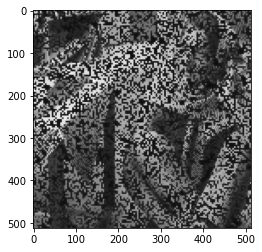

In [24]:
import bm3d

denoised = bm3d.bm3d(corrupted, sigma_psd=np.std(mask), stage_arg=bm3d.BM3DStages.HARD_THRESHOLDING)

plt.imshow(denoised*(1-mask)+ corrupted, cmap='gray')

iteration 49 | error 22.17 | psnr 27.27 | ssim 0.89 | time 4.8003


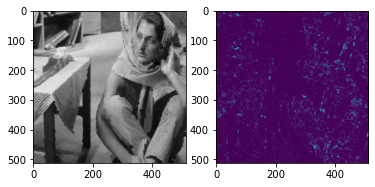

In [25]:
from core.admm import ADMM

rho = 0.0005
tau = 1.2e-05	
lambd = 0.0002

admm = ADMM()

    
estimated = admm.restore(corrupted, mask, sol=image, iters=50, rho=rho, tau=tau, lambd=lambd)


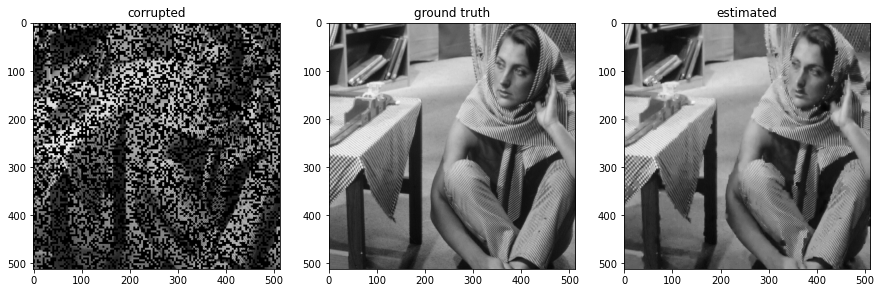

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))

axs[0].set_title("corrupted")
axs[0].imshow(corrupted, cmap='gray')

axs[1].set_title("ground truth")
axs[1].imshow(image, cmap='gray')

axs[2].set_title("estimated")
axs[2].imshow(estimated, cmap='gray')


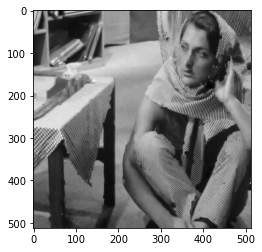

In [27]:
image2 = corrupted + (1 - mask)*estimated

plt.imshow(image2, cmap="gray")

In [28]:
from core.utils import psnr

psnr(image, corrupted)

8.861546929040395

In [29]:
psnr(image, estimated)

27.271264811428072